In [1]:
import pandas as pd
import numpy as np

****
## Reading and Displaying dataset ##
****

In [2]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


****
# Data Visualization #
****

In [3]:
# Importing seaborn and pyplot
import matplotlib.pyplot as plt
import seaborn as sns

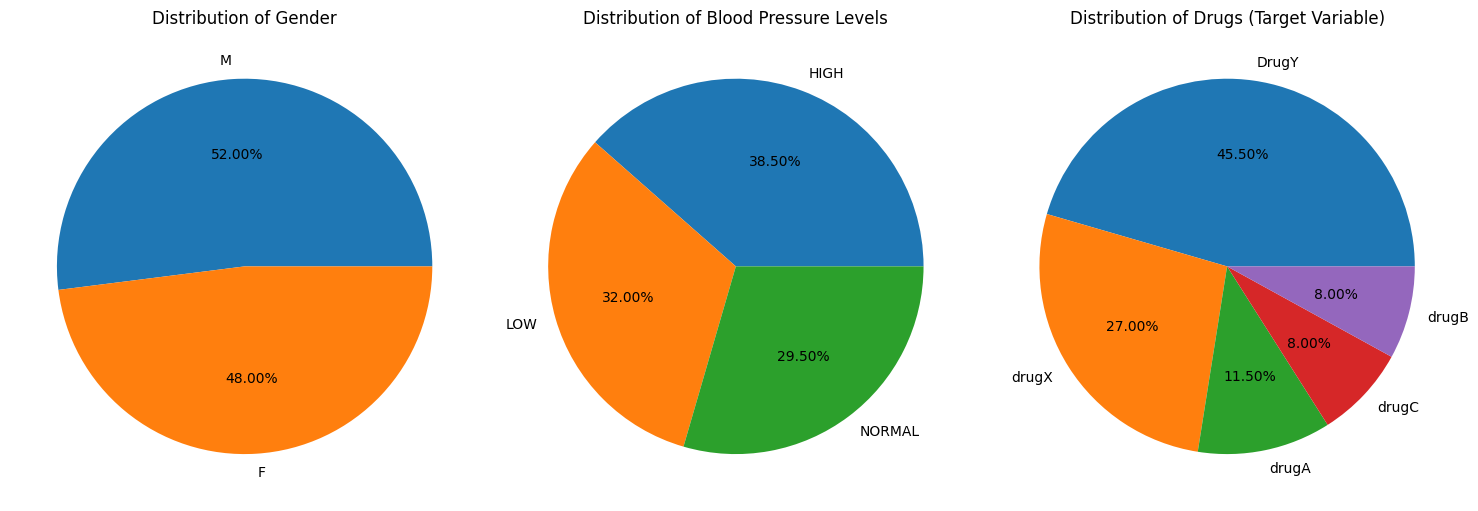

In [4]:
# Let us look at the distribution of some of the columns
tdf=df['Sex'].value_counts().reset_index()
tdf1=df['BP'].value_counts().reset_index()
tdf2=df['Drug'].value_counts().reset_index()

# Plotting pie charts
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].pie(x=tdf['count'],labels=tdf['Sex'],autopct='%.2f%%')
ax[0].set_title('Distribution of Gender')
ax[1].pie(x=tdf1['count'],labels=tdf1['BP'],autopct='%.2f%%')
ax[1].set_title('Distribution of Blood Pressure Levels')
ax[2].pie(x=tdf2['count'],labels=tdf2['Drug'],autopct='%.2f%%')
ax[2].set_title('Distribution of Drugs (Target Variable)')
plt.tight_layout()
plt.show()

**Findings:**

1. Sex column which represents male and female gender is balanced, which is great.
2. Blood Pressure Levels have three categories (High,Normal and Low) and all three are allmost balanced. (Nobody takes the Dominant Proportion)
3. We have 5 different types of Drugs. Drug Y and Drug X constitute almost 72% of the dataset. The remaining 28% is covered by DrugA,DrugB and DrugC.

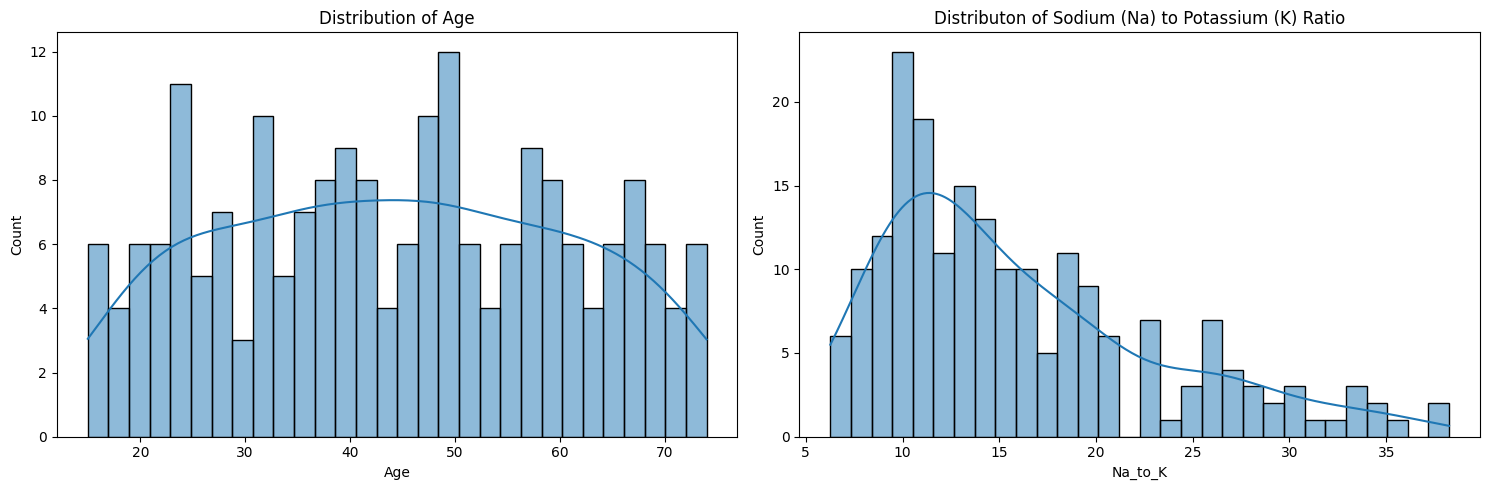

In [5]:
# Let us look at how our Age and Na_to_K (Na to Potassium Ratio) are distributed

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df,x='Age',kde=True,ax=ax[0],bins=30)
ax[0].set_title('Distribution of Age')
sns.histplot(data=df,x='Na_to_K',kde=True,ax=ax[1],bins=30)
ax[1].set_title('Distributon of Sodium (Na) to Potassium (K) Ratio')
plt.tight_layout()
plt.show()

**Findings:**

**Age Distribution:**

1. The histogram on the left displays the distribution of the variable Age.
2. The distribution appears relatively uniform, with counts ranging from 2 to 12 across age groups.
3. There is no significant skewness, and the age distribution seems spread fairly across the dataset, indicating a balanced representation of age groups.
4. The kernel density estimate (KDE) overlay shows a somewhat symmetrical distribution, peaking around the 50–60 age range, suggesting a higher concentration of individuals in this age group.

**Sodium (Na) to Potassium (K) Ratio Distribution:**

1. The histogram on the right shows the distribution of the Na to K Ratio.
2. The distribution is right-skewed, with a large number of individuals having a lower Na to K ratio (around 10), and fewer individuals having higher ratios.
3. The KDE plot confirms this skewness, showing that the majority of values fall between 5 and 15.
4. This indicates that most individuals in the dataset have a lower Na to K ratio, with very few having extreme values above 30.

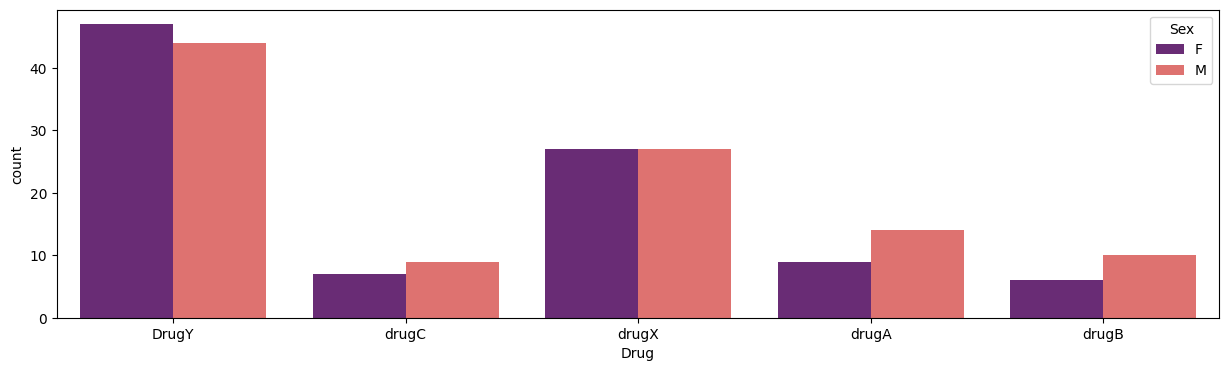

In [6]:
# Let us look at how different Drugs are distributed and how Gender is related to it

plt.figure(figsize=(15,4))
sns.countplot(data=df,x='Drug',hue='Sex',palette='magma')
plt.show()

**Conclusion:**

1. DrugY and drugX are the most frequently used drugs across both genders, with DrugY showing a slight female preference.
2. drugA and drugB are used more by males, suggesting potential gender-based preferences for these drugs.
3. drugC is the least used drug across both genders, indicating it may be less commonly prescribed or relevant to this dataset.
4. The overall gender distribution shows that most drugs do not have extreme gender disparities, except for drugA and drugB, where male users dominate slightly.

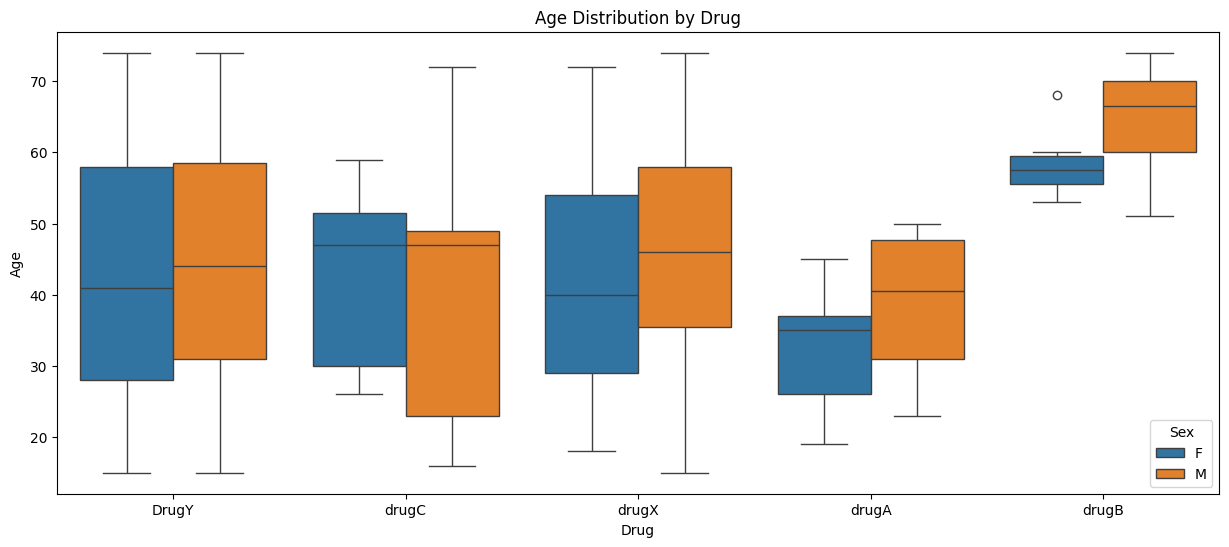

In [7]:
# We saw how different drugs were used by Males and Females, and we saw that some of the drugs were prescribes to Males more than Females and Vice versa.
# Let us bring Age into the picture and see if we can find anything
plt.figure(figsize=(15,6))
sns.boxplot(x='Drug', y='Age', data=df,hue='Sex')
plt.title('Age Distribution by Drug')
plt.show()

**Some Findings:**

**Drug Y:**

1. The distribution for both males and females spans a broad age range (early 20s to early 70s).
2. The median age for females is around 40, while for males it tends to be slightly higher, around 50.
3. This wide age dispersion implies that Drug Y is utilized for a diverse age demographic, but with a subtle skew towards older males.

**Drug C:**

1. A notable divergence is observed in the median ages for males and females.
2. Males receiving Drug C tend to be older (median age around 50), while females are again older, with a median age near 50.
3. This disparity suggests that Drug C could be prescribed with consideration for age, particularly older males and younger females.

**Drug X:**

1. The median age for females is around 40, while males have a higher median age near 50, though both genders experience a similar overall age range.
2. This points to Drug X being administered across a broad middle-age spectrum but favoring males at slightly older ages.

**Drug A:**

1. There is minimal variation in the age distribution for Drug A, with both males and females falling predominantly in the middle-age range.
2. Median ages sit close to 35 for females and 40 for males, indicating that Drug A is more commonly prescribed to middle-aged individuals.

**Drug B:**

1. The age distribution for Drug B reveals a stark contrast between genders.
2. Males receiving this drug are notably older, with a median age around 65, whereas females receiving the drug are generally younger, with a median age of around 40.
3. This pattern highlights Drug B as being potentially tailored to older males and younger females.

**No visible Outliers :)**

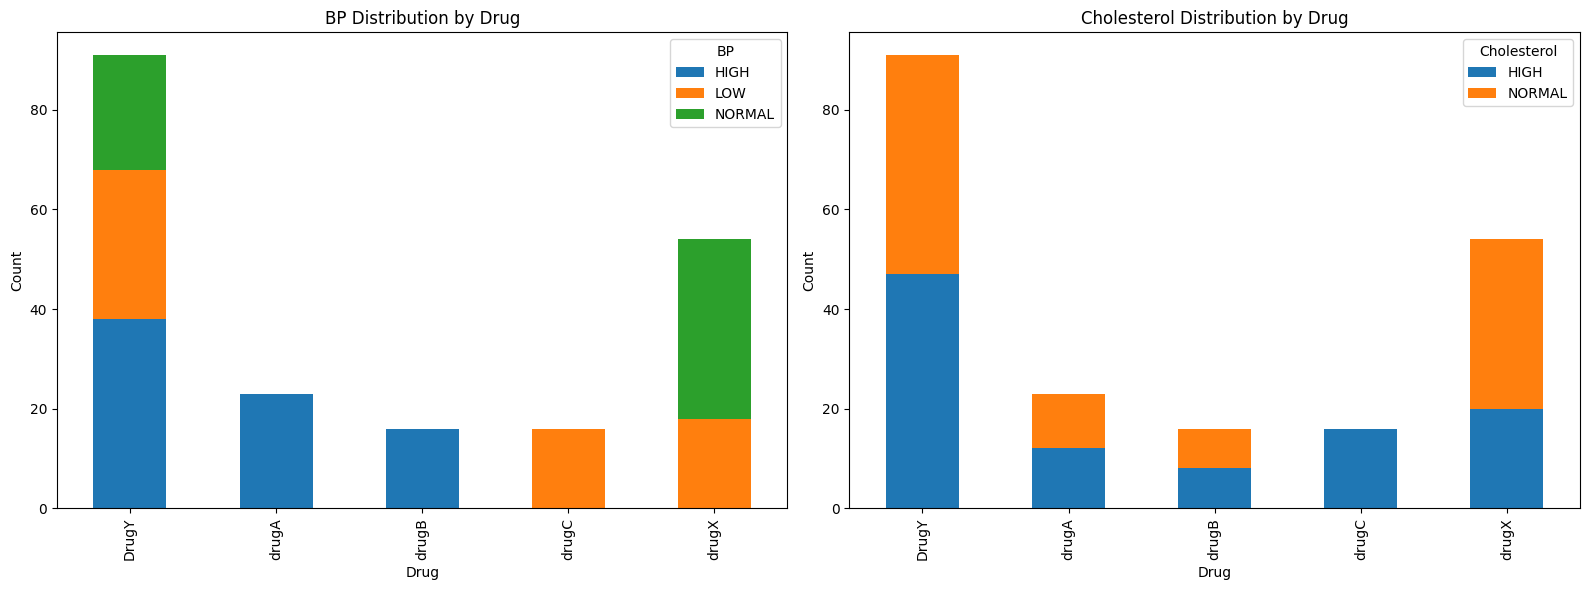

In [8]:
# Let us look at how BP and Cholestrol affects drug prescription

bp_counts=df.groupby(['Drug','BP']).size().unstack(fill_value=0)
cholesterol_counts=df.groupby(['Drug','Cholesterol']).size().unstack(fill_value=0)

fig, axes=plt.subplots(1,2,figsize=(16,6))
bp_counts.plot(kind='bar',stacked=True,ax=axes[0])
axes[0].set_title('BP Distribution by Drug')
axes[0].set_xlabel('Drug')
axes[0].set_ylabel('Count')
cholesterol_counts.plot(kind='bar',stacked=True,ax=axes[1],)
axes[1].set_title('Cholesterol Distribution by Drug')
axes[1].set_xlabel('Drug')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


**Blood Pressure (BP) Distribution by Drug:**

1. DrugY exhibits the highest usage across all blood pressure categories (HIGH, LOW, and NORMAL), with a particularly large number of users having HIGH BP.
2. DrugA is primarily prescribed to individuals with HIGH BP, indicating its targeted use for managing elevated blood pressure.
3. DrugB is predominantly used by individuals with LOW BP, though it has a relatively smaller user base.
4. DrugC shows a focus on managing LOW BP, with no notable use among individuals with HIGH or NORMAL BP.
5. DrugX serves a balanced group of users with LOW and NORMAL BP, suggesting it is versatile for both conditions, though it is not commonly prescribed for HIGH BP.

**Cholesterol Distribution by Drug:**
1. DrugY also leads in terms of cholesterol management, being used by the highest number of individuals with both HIGH and NORMAL cholesterol levels.
2. DrugA and DrugX exhibit a balanced distribution between HIGH and NORMAL cholesterol users, though DrugA serves a smaller user population.
3. DrugB and DrugC are more frequently used by individuals with HIGH cholesterol, with DrugC showing a preference for treating elevated cholesterol levels despite having a smaller overall user base.

**Key Insights:**
1. DrugY emerges as the most widely prescribed drug, catering to a diverse population with varying BP and cholesterol levels, making it a versatile treatment option.
2. DrugA and DrugB seem to be focused more on treating high-risk conditions such as HIGH BP and HIGH cholesterol.
3. DrugX appears to be used across a wider range of conditions, making it suitable for individuals with both LOW BP and NORMAL cholesterol.

****
# Data Preprocessing #
****

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
# checking again for null values
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

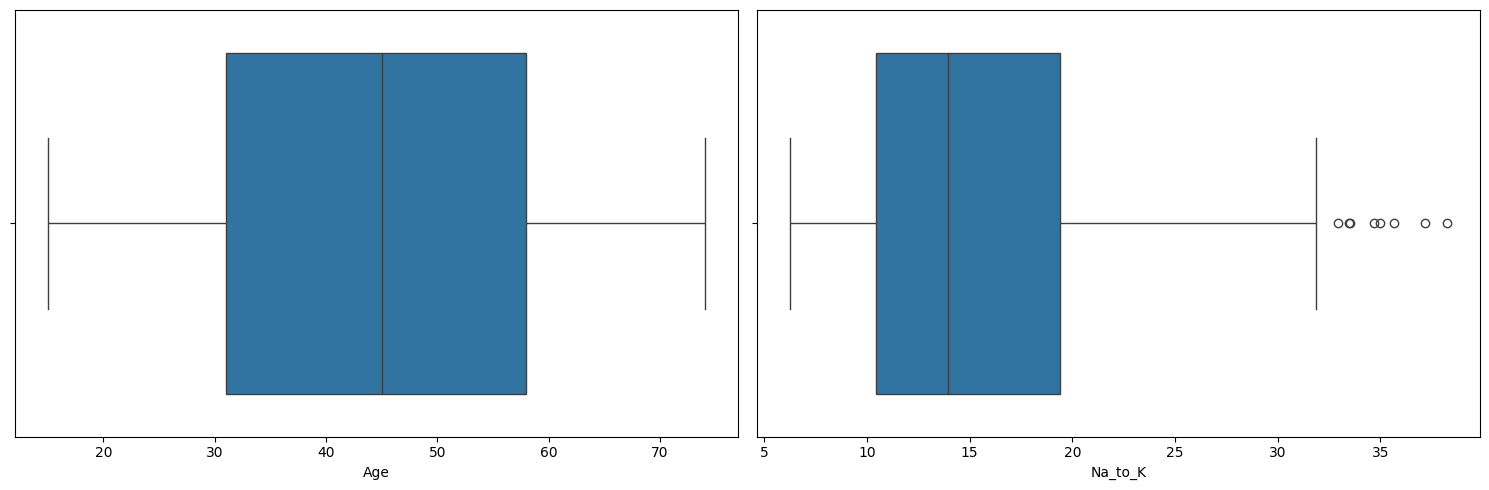

In [11]:
# Lets check for outliers for our columns which contain continuous values
# Best way is to plot a box plot

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df,x='Age',ax=ax[0])
sns.boxplot(data=df,x='Na_to_K',ax=ax[1])
plt.tight_layout()
plt.show()

**-> Age:** No outliers

**-> Sodium (Na) to Potassium (K) Ratio (Na_to_K):** Negligible Outliers, so i will be ignoring it for now



**-> If you still want to remove outlier kindly use the below code:**

*quartile_1=df['Na_to_K'].quantile(0.25)  #1st quartile*

*quartile_3=df['Na_to_K'].quantile(0.75)  #3rd quartile*

*iqr=quartile_3-quartile_1 # Inter quartile range*

*lb=quartile_1-1.5*iqr  # Lower bound*

*ub=quartile_3+1.5*iqr  # Upper Bound*

*df=df[(df['Na_to_K']>=lb)&(df['Na_to_K']<=ub)]*

In [12]:
# Let us focus on the columns containing categorical values
for col in df.columns[df.dtypes=='object']:
    print(df[col].value_counts(),'\n\n')

Sex
M    104
F     96
Name: count, dtype: int64 


BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64 


Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64 


Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64 




In [13]:
# Let us convert them into numeric format using label encoder
# We can manually convert them by Mapping them to numeric values, applting the lambda funciton and so on... 
#For now I will be using Label Encoder as it is easier
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])   # Encoding

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


****
# Feature Engineering #
****

In [17]:
# The data looks good
# Let us see how the correlate with each other and see how much they matter for Drug Prescription

#First let us calcualte Mutual Information 
from sklearn.feature_selection import mutual_info_classif
tdf=df.copy()  
x=tdf.drop(columns='Drug')
y=tdf['Drug']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

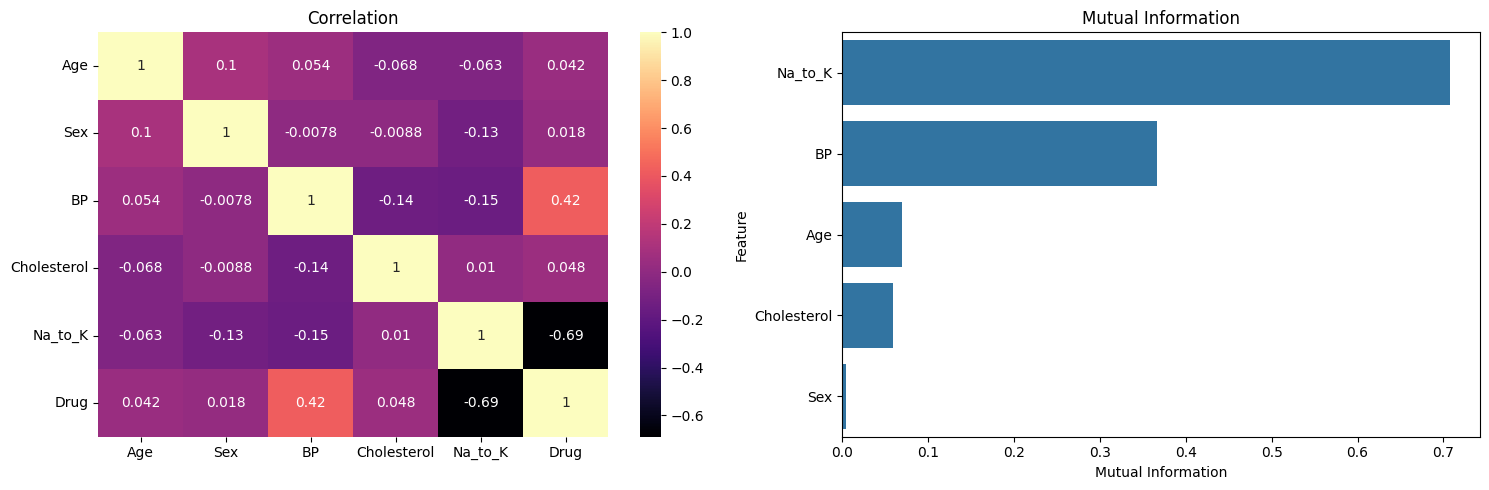

In [18]:
# Let us visualize correlation and mutual information

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.show()

**We can create new features:**

1.  Risk Level: risk category based on a combination of BP (Blood Pressure), Cholesterol, and Na_to_K ratio.
2.  Age Group: We can group ages into bins and categorize them
3.  Na/K Ratio Level: We can group this similar to Age and categorzie them
4.  Combined BP and Cholesterol Risk: Combine both BP and Cholesterol and create a new column (Done Below)
5.  Drug Effectiveness
6.  Chronic Condition Indicator (Binary column)

**We will be creating only one new feature in this notebok, based on BP and Cholesterol**

In [19]:
def bp_cholesterol_risk(row):
    if row['BP'] == 0 and row['Cholesterol'] == 0:
        return 'Critical'
    elif row['BP'] == 1 and row['Cholesterol'] == 1:
        return 'Low Risk'
    else:
        return 'Moderate'

df['BP_Cholesterol_Risk'] = df.apply(bp_cholesterol_risk, axis=1)
df['BP_Cholesterol_Risk']=le.fit_transform(df['BP_Cholesterol_Risk'])

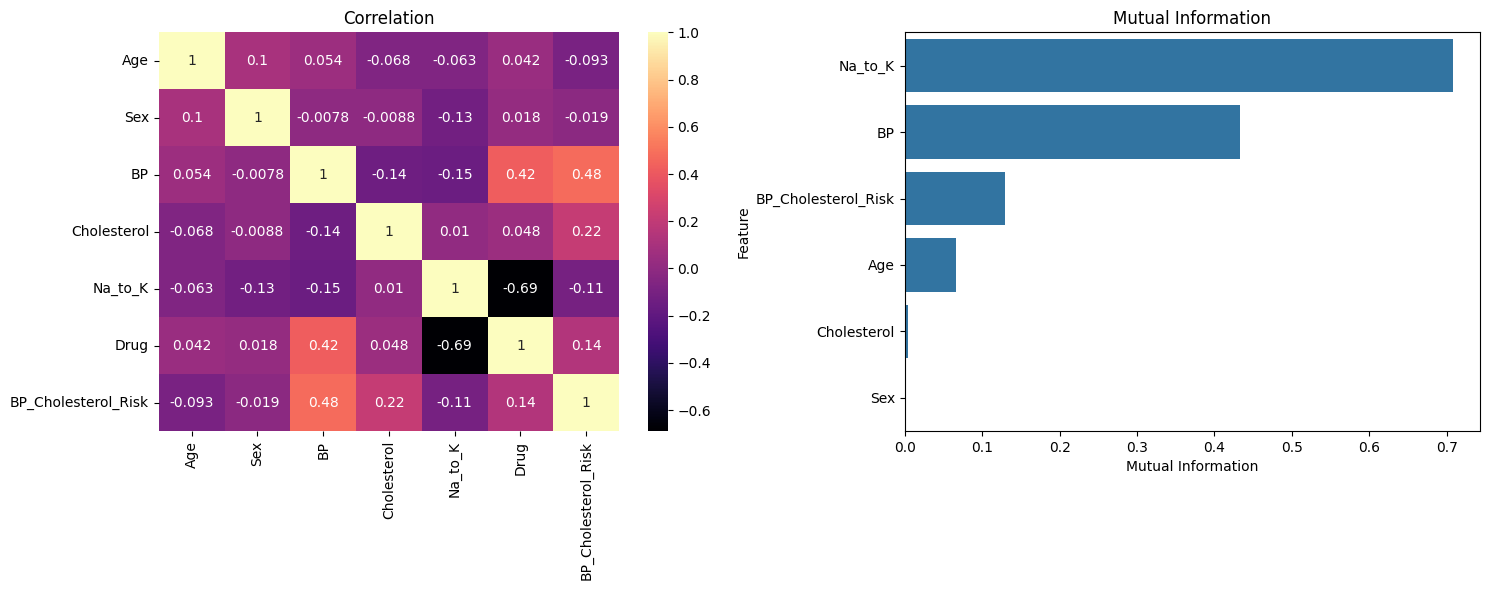

In [20]:
tdf=df.copy()  
x=tdf.drop(columns='Drug')
y=tdf['Drug']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.show()

****
# Data Preparation #
****

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x=df.drop(columns='Drug')
y=df['Drug']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)  #Splitting the data into training and testing

****
# Models #
****

In [23]:
# importing
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [24]:
cr=[] #Storing classification reports
cm_t=[] # Storing Confusion matrix for Training set
cm=[] # Storing Confusion matrix for Testing set
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

****
## Model - K Nearest Neighbors Classifier ##
****

In [25]:
knn=KNeighborsClassifier()
parmas={'n_neighbors':list(np.arange(2,20))}
nknn=GridSearchCV(knn,param_grid=parmas,cv=10,n_jobs=-1,scoring='accuracy')
nknn.fit(x_t,y_t)
print(nknn.best_params_)
print(nknn.best_score_)

{'n_neighbors': 2}
0.72


In [26]:
nknn=nknn.best_estimator_
predt1=nknn.predict(x_t)
pred1=nknn.predict(x_te)

In [27]:
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1,average='macro'))
p.append(precision_score(y_te,pred1,average='macro'))
r_t.append(recall_score(y_t,predt1,average='macro'))
r.append(recall_score(y_te,pred1,average='macro'))
f1_t.append(f1_score(y_t,predt1,average='macro'))
f1.append(f1_score(y_te,pred1,average='macro'))

****
## Model - Decison Tree Classifier ##
****

In [28]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',n_iter=5)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
best_alpha=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.0}
0.9866666666666667


In [29]:
dt=DecisionTreeClassifier(ccp_alpha=best_alpha)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51))}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)

{'min_samples_split': 7, 'min_samples_leaf': 15, 'criterion': 'gini'}
0.8333333333333334


In [30]:
ndt=ndt.best_estimator_
predt2=ndt.predict(x_t)
pred2=ndt.predict(x_te)

In [31]:
cr.append(classification_report(y_te,pred2,zero_division=0))
cm_t.append(confusion_matrix(y_t,predt2))
cm.append(confusion_matrix(y_te,pred2))
acc_t.append(accuracy_score(y_t,predt2))
acc.append(accuracy_score(y_te,pred2))
p_t.append(precision_score(y_t,predt2,average='macro', zero_division=0))
p.append(precision_score(y_te,pred2,average='macro', zero_division=0))
r_t.append(recall_score(y_t,predt2,average='macro'))
r.append(recall_score(y_te,pred2,average='macro'))
f1_t.append(f1_score(y_t,predt2,average='macro'))
f1.append(f1_score(y_te,pred2,average='macro'))

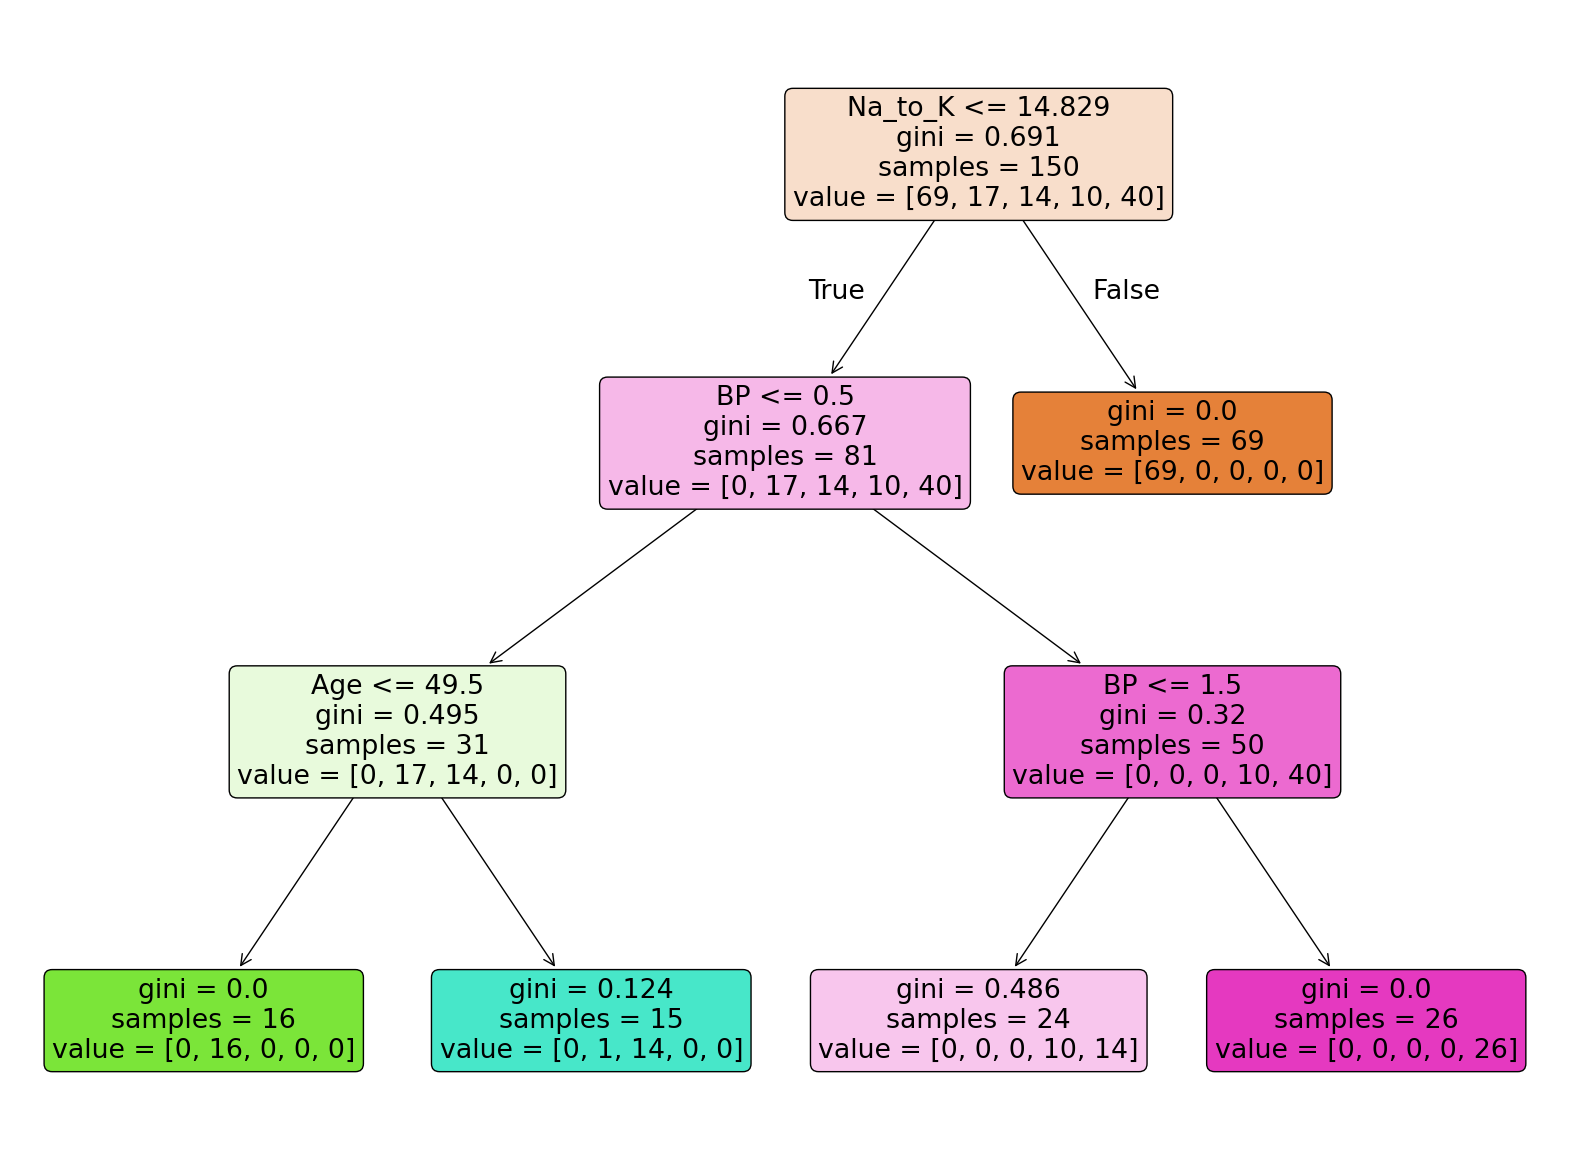

In [32]:
plt.figure(figsize=(20, 15))
plot_tree(ndt,filled=True,feature_names=x_t.columns,rounded=True)
plt.show()

****
## Model - Random Forest Classifier ##
****

In [33]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
       'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)

{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'criterion': 'entropy'}
0.9800000000000001


In [34]:
nrf=nrf.best_estimator_
predt3=nrf.predict(x_t)
pred3=nrf.predict(x_te)

In [35]:
cr.append(classification_report(y_te,pred3,zero_division=0))
cm_t.append(confusion_matrix(y_t,predt3))
cm.append(confusion_matrix(y_te,pred3))
acc_t.append(accuracy_score(y_t,predt3))
acc.append(accuracy_score(y_te,pred3))
p_t.append(precision_score(y_t,predt3,average='macro', zero_division=0))
p.append(precision_score(y_te,pred3,average='macro', zero_division=0))
r_t.append(recall_score(y_t,predt3,average='macro'))
r.append(recall_score(y_te,pred3,average='macro'))
f1_t.append(f1_score(y_t,predt3,average='macro'))
f1.append(f1_score(y_te,pred3,average='macro'))

****
## AdaBoost Classifier ##
****

In [36]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [1000],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)

{'n_estimators': 1000, 'learning_rate': 1.73}
0.9800000000000001


In [37]:
nada=nada.best_estimator_
predt4=nada.predict(x_t)
pred4=nada.predict(x_te)

In [38]:
cr.append(classification_report(y_te,pred4,zero_division=0))
cm_t.append(confusion_matrix(y_t,predt4))
cm.append(confusion_matrix(y_te,pred4))
acc_t.append(accuracy_score(y_t,predt4))
acc.append(accuracy_score(y_te,pred4))
p_t.append(precision_score(y_t,predt4,average='macro', zero_division=0))
p.append(precision_score(y_te,pred4,average='macro', zero_division=0))
r_t.append(recall_score(y_t,predt4,average='macro'))
r.append(recall_score(y_te,pred4,average='macro'))
f1_t.append(f1_score(y_t,predt4,average='macro'))
f1.append(f1_score(y_te,pred4,average='macro'))

****
# Model Evaluation Metrics #
****

**Classification Reports**

In [39]:
models=['KNN','Decision Tree','Random Forest','Adaboost']
for model, report in zip(models, cr):
    print(f"Classification Report for {model}:\n{report}\n")

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.50      0.33      0.40         6
           2       0.33      1.00      0.50         2
           3       0.25      0.33      0.29         6
           4       0.83      0.36      0.50        14

    accuracy                           0.64        50
   macro avg       0.54      0.60      0.51        50
weighted avg       0.69      0.64      0.63        50


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         6
           4       0.70      1.00      0.82        14

    accuracy                           0.88        50
   macro avg       0.74      0.80      0.76        50
weig

**Training Metrics**

In [40]:
m_t=pd.DataFrame({'Classification Algorithms':models,'Training Accuracy':acc_t,'Training Precision':p_t,
                  'Training Recall':r_t,'Training F1 Score':f1_t})
m_t

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,KNN,0.866667,0.800859,0.845714,0.805000
1,Decision Tree,0.926667,0.746667,0.788235,0.764821
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,Adaboost,1.000000,1.000000,1.000000,1.000000


**Testing Metrics**

In [41]:
m_te=pd.DataFrame({'Classification Algorithms':models,'Testing Accuracy':acc,'Testing Precision':p,
                  'Testing Recall':r,'Testing F1 Score':f1})
m_te

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,KNN,0.64,0.544872,0.595671,0.512143
1,Decision Tree,0.88,0.740000,0.800000,0.764706
2,Random Forest,1.00,1.000000,1.000000,1.000000
3,Adaboost,1.00,1.000000,1.000000,1.000000


**Confusion Matrices for Training Set**

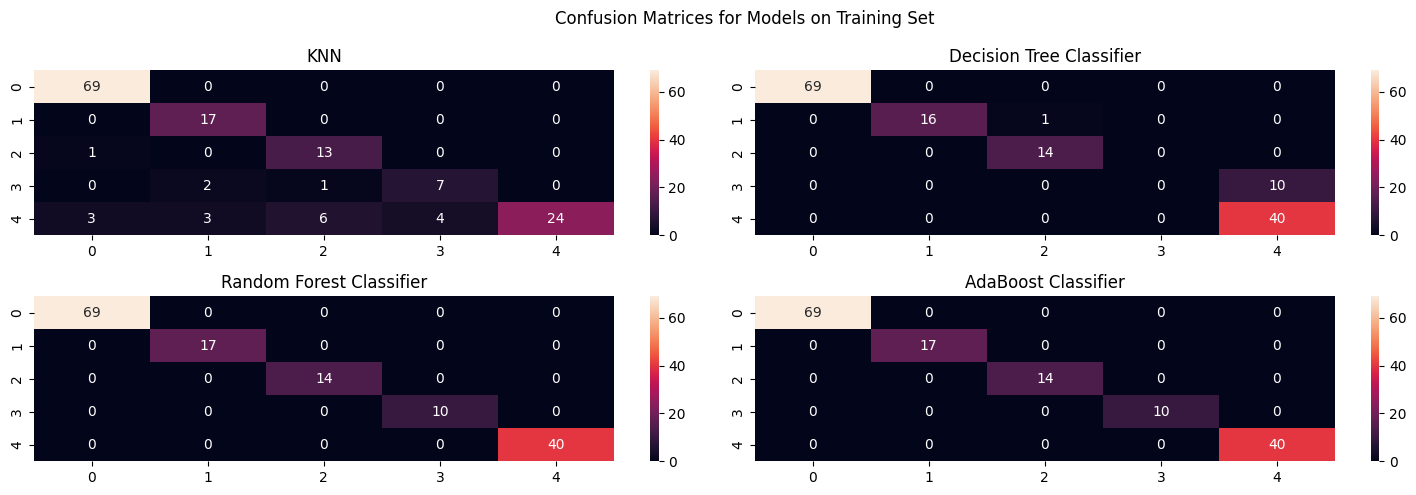

In [42]:
mods=['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier']
fig,ax=plt.subplots(2,2,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(mods):
    sns.heatmap(cm_t[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==2):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
plt.tight_layout()
plt.show()

**Confusion Matrices for Testing Set**

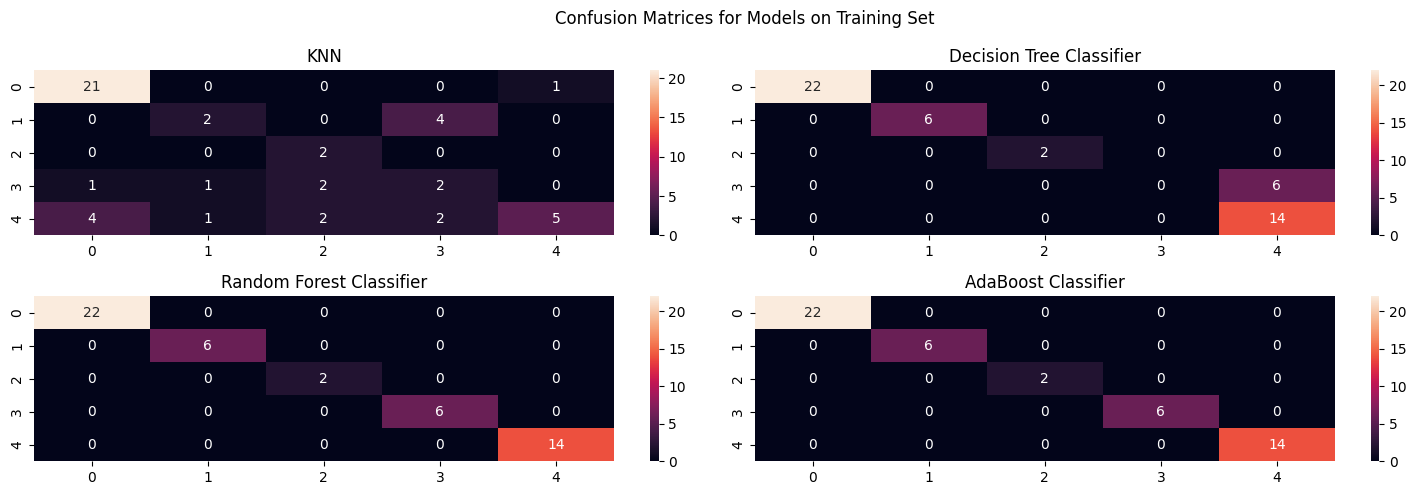

In [43]:
mods=['KNN','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier']
fig,ax=plt.subplots(2,2,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(mods):
    sns.heatmap(cm[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==2):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
plt.tight_layout()
plt.show()

****
# Conclusions #
****

1. The Random Forest and AdaBoost classifiers yielded exceptional results; however, caution is warranted regarding overfitting, especially in practical applications. Future work could involve employing cross-validation techniques and exploring hyperparameter tuning to further enhance model robustness and generalization.
2. The KNN algorithm’s performance highlights the importance of feature scaling and distance metrics, which may benefit from optimization.
3. The Decision Tree strikes a balance, indicating its utility as a baseline model in similar classification tasks.

****
# Feedback and Suggestions #
****

**Kindly provide feedback and suggestions to improve this notebook**

**Kindly Upvote if you liked this notebook or if it helped you in any way :)**